# Simulation von Übertragungsfunktion eines geschlossenen Regelkreises
https://docs.sympy.org/latest/modules/physics/control/control.html

## Übertragungsfunktionen

In [4]:
from sympy import *
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
Kp,Ki,Kd,Ke,tau,D,R,G,F = symbols('Kp,Ki,Kd,Ke,tau,D,R,G,F')
R,G,F = symbols('R,G,F')

#Zahlenwerte
vals = {Kp: 1, Ki: 0, Kd: 0,Ke: 1,tau:1,D:0}

G_eqrhs = TransferFunction(Ke, 1+ s*tau, s)
display(Eq(G,G_eqrhs))
display(Eq(G,G_eqrhs.subs(vals)))


#m = 1
#kc = 10
##kd = 1

#Kp =1 
#Ki = 0
#Kd = 0


R_eqrhs = TransferFunction(Kp, 1, s)  + TransferFunction(Ki, s, s) + TransferFunction(Kd * s, 1, s)
display(Eq(R,R_eqrhs))
display(Eq(R,R_eqrhs.subs(vals)))


F_eqrhs = (R_eqrhs*G_eqrhs/(TransferFunction(1,1,s)+R_eqrhs*G_eqrhs)).doit()
display(Eq(F,F_eqrhs))
display(Eq(F,F_eqrhs.subs(vals)))
G1 = G_eqrhs.subs(vals)

Eq(G, TransferFunction(Ke, s*tau + 1, s))

Eq(G, TransferFunction(1, s + 1, s))

Eq(R, Parallel(TransferFunction(Kp, 1, s), TransferFunction(Ki, s, s), TransferFunction(Kd*s, 1, s)))

Eq(R, Parallel(TransferFunction(1, 1, s), TransferFunction(0, s, s), TransferFunction(0, 1, s)))

Eq(F, TransferFunction(Ke*s*(Ki + s*(Kd*s + Kp))*(s*tau + 1), s*(Ke*(Ki + s*(Kd*s + Kp)) + s*(s*tau + 1))*(s*tau + 1), s))

Eq(F, TransferFunction(s**2*(s + 1), s*(s + 1)*(s*(s + 1) + s), s))

## Mathematische Operationen
[OneNote Online](https://htlanichstrasse.sharepoint.com/sites/MTRS_GoetL_5AHEL_2223/_layouts/OneNote.aspx?id=%2Fsites%2FMTRS_GoetL_5AHEL_2223%2FSiteAssets%2FMTRS_GoetL_5AHEL_2223%20Notebook&wd=target%28_Content%20Library%2FRegelungstechnik.one%7CAB6D4D94-43A8-4379-834E-2FC0BACF7785%2FBlockschaltbilder%7C88EEE755-EBC7-4701-9DBB-DF1C6D906D99%2F%29)

## Grafische Darstellung
[Bodediagramm](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#bode-plot)
[Step response](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#step-response-plot)


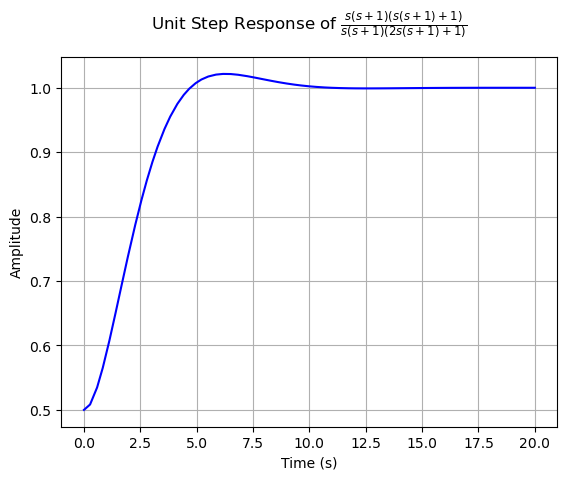

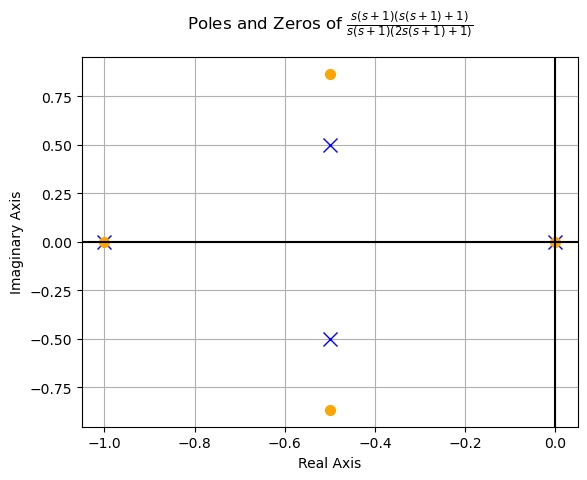

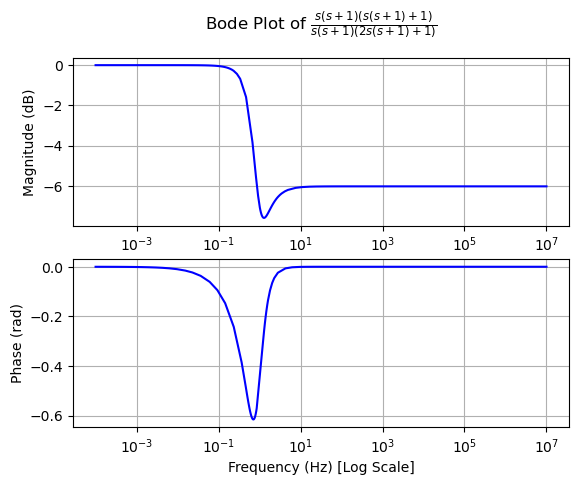

In [8]:
vals['Ke']=1
vals['tau'] = 1
vals['Kp']=1
vals['Ki'] = 1
vals['Kd'] = 1


from sympy.physics.control.control_plots import step_response_plot
step_response_plot(F_eqrhs.subs(vals),upper_limit=vals['tau']*20)  

from sympy.physics.control.control_plots import pole_zero_plot
pole_zero_plot(F_eqrhs.subs(vals))  

from sympy.physics.control.control_plots import bode_plot
bode_plot(F_eqrhs.subs(vals), initial_exp=-4, final_exp=7)

### Impulsantwortantwort
[Impuls response](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#impulse-response-plot)  
Zeigt den Ausgang wenn am Eingang ein Dirac-Impuls angelegt wird. Vergleichbar mit dem Schlag des Klöppels auf die Glocke.

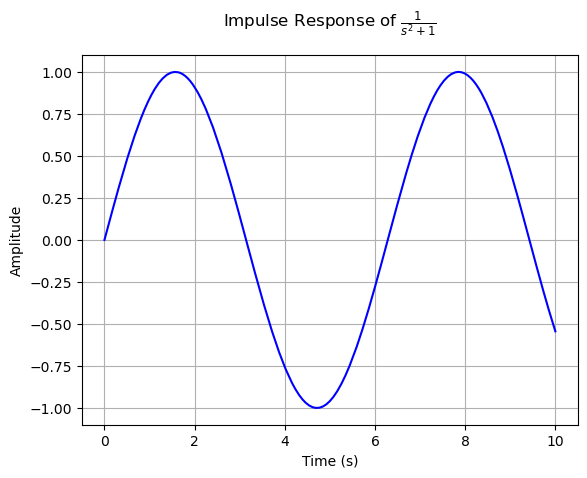

In [3]:
from sympy.physics.control.control_plots import impulse_response_plot
impulse_response_plot(G1)

### Sprungantwort